In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling
import scipy.stats as stats
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
#Module related to calculation of metrics
from sklearn import metrics
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
#Modules related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression

In [3]:
cust_data=pd.read_csv("Customers_new.csv")

In [4]:
cust_data.head()

,customer_Id,DOB,Gender,city_code,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,268408,01-02-1970,M,4.0,NaN,NaN,NaN,NaN
1,269696,01-07-1970,F,8.0,NaN,NaN,NaN,NaN
2,268159,01-08-1970,F,8.0,NaN,NaN,NaN,NaN
3,270181,01-10-1970,F,2.0,NaN,NaN,NaN,NaN
4,268073,01-11-1970,M,1.0,NaN,NaN,NaN,NaN


In [5]:
trans_data=pd.read_csv("Transactions_new.csv")

In [6]:
trans_data["join_id"]=trans_data["prod_cat_code"].astype(str)+" "+trans_data["prod_subcat_code"].astype(str)

In [7]:
trans_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1 1
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3 5
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5 6
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,6 11
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5 6


In [8]:
prod_info=pd.read_csv("prod_cat_info.csv")

In [9]:
prod_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [10]:
#creating a new column as join id for joining purpose
prod_info["join_id"]=prod_info["prod_cat_code"].astype(str)+" "+prod_info["prod_sub_cat_code"].astype(str)

In [11]:
prod_info.drop(columns=["prod_cat_code","prod_sub_cat_code"],inplace=True)

In [12]:
prod_info.head(5)

,prod_cat,prod_subcat,join_id
0,Clothing,Mens,1 4
1,Clothing,Women,1 1
2,Clothing,Kids,1 3
3,Footwear,Mens,2 1
4,Footwear,Women,2 3


# EDA(Exploratory Data analysis)

### Deleting Unwanted column which we dont need

In [13]:
#Storing the column name in a variables whicch we need to delete
u_clm=['Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7']

In [14]:
#deleting unwanted column form the dataset 
cust_data.drop(columns=u_clm,inplace=True)

In [15]:
cust_data

,customer_Id,DOB,Gender,city_code
0,268408,01-02-1970,M,4.0
1,269696,01-07-1970,F,8.0
2,268159,01-08-1970,F,8.0
3,270181,01-10-1970,F,2.0
4,268073,01-11-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [16]:
trans_data1 = pd.merge(trans_data, prod_info, on='join_id', how='inner')

In [17]:
trans_data1.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,1 1,Clothing,Women


In [18]:
#changing the column name into customer_id for joining purpose 
trans_data1.rename(columns={'cust_id': 'customer_Id'}, inplace=True)

In [19]:
trans_data1.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,1 1,Clothing,Women


## Merging Two dataset Using Inner join

In [20]:
#Joing the data using inner join technique and customer Id is our common column 
merged_d = pd.merge(cust_data, trans_data1, on='customer_Id', how='inner')

In [21]:
merged_d.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id,prod_cat,prod_subcat
0,268408,01-02-1970,M,4.0,63314547725,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,1 1,Clothing,Women
1,268408,01-02-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5 7,Books,Fiction
2,268408,01-02-1970,M,4.0,12644501524,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,4 4,Bags,Women


In [22]:
#creating a Column Status where the total_amt is negative status will be returned and
#where total_amt is positive there will be  accepted
merged_d["Status"] = merged_d["total_amt"].apply(lambda x: "Returned" if x<0 else "Accepted")

In [23]:
#checking the Info of our dataset 
merged_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  join_id           23053 non-null  object 
 14  prod_cat          23053 non-null  object 
 15  prod_subcat       23053 non-null  object 
 16  Status            23053 non-null  object

In [24]:
#checking the null values 
merged_d.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
join_id             0
prod_cat            0
prod_subcat         0
Status              0
dtype: int64

In [25]:
#replacing the null values 
merged_d["Gender"].fillna(merged_d["Gender"].fillna("M"),inplace=True)
merged_d["city_code"].fillna(merged_d["city_code"].fillna("4"),inplace=True)

In [26]:
#removing the Null values using Drop_na #replace the null values acording to sir 
print(merged_d.isnull().sum())

customer_Id         0
DOB                 0
Gender              0
city_code           0
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
join_id             0
prod_cat            0
prod_subcat         0
Status              0
dtype: int64


In [27]:
#checking for duplicates 
print(f"We have {merged_d.duplicated().sum()} Duplicates values")
#removing them
merged_d.drop_duplicates(inplace=True)
#Print duplicates after removing them 
print(f"After removing duplicates we have {merged_d.duplicated().sum()} duplicates values")


We have 13 Duplicates values
After removing duplicates we have 0 duplicates values


In [28]:
merged_d.to_csv("merged_data.csv",index=False)

In [29]:
# checking the value counts of category varibales store_type
value_count=merged_d["Store_type"].value_counts()

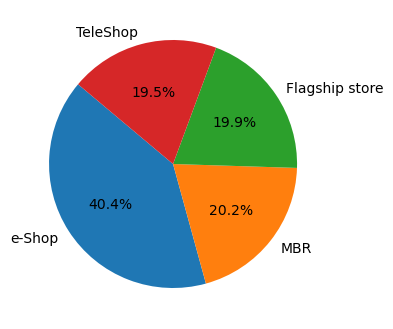

In [30]:
plt.figure(figsize=(4,8))
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%', startangle=140)
plt.show()

In [31]:
#Encoding the some column using where method form numpy and label encoder 
merged_d["Gender"]=np.where(merged_d["Gender"]=='M',1,0)
merged_d["Status"]=np.where(merged_d["Status"]=='Accepted',1,0)
# Initialize LabelEncoder
label_encoder = LabelEncoder()
merged_d['Store_type'] = label_encoder.fit_transform(merged_d['Store_type'])

In [32]:
merged_d.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id,prod_cat,prod_subcat,Status
0,268408,01-02-1970,1,4.0,63314547725,26-04-2012,1,1,1,806,84.630,890.630,0,1 1,Clothing,Women,1
1,268408,01-02-1970,1,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,2,5 7,Books,Fiction,1


In [33]:
merged_d.tail(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,join_id,prod_cat,prod_subcat,Status
23051,274308,29-12-1992,0,5.0,26208690928,22-10-2012,1,2,2,898,188.58,1984.58,1,2 1,Footwear,Mens,1
23052,274308,29-12-1992,0,5.0,57358822237,09-05-2012,1,2,4,876,367.92,3871.92,3,2 1,Footwear,Mens,1


###  Now checking the Outliers on our dataset 

In [34]:
#before finding the outliers we converted the some column in numerical column
merged_d['Gender'] = pd.to_numeric(merged_d['Gender'], errors='coerce')
merged_d['Store_type'] = pd.to_numeric(merged_d['Store_type'], errors='coerce')
merged_d['Status'] = pd.to_numeric(merged_d['Status'], errors='coerce')

##### Deviding out dataset with numerical and obejct 

In [35]:
merged_num = merged_d.select_dtypes(['float64', 'int64', 'float32', 'int32'])
merged_obj = merged_d.select_dtypes(['object'])

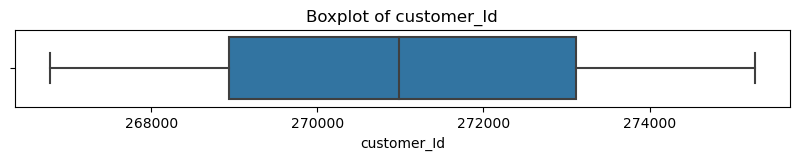

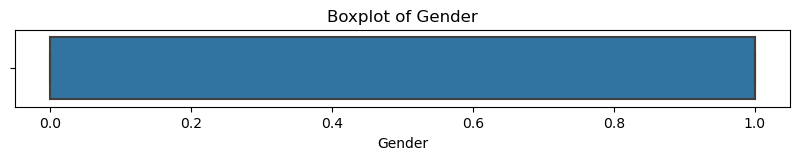

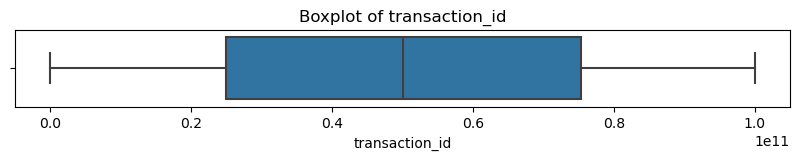

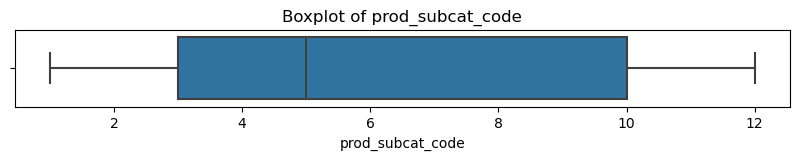

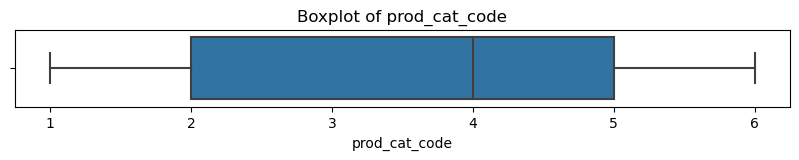

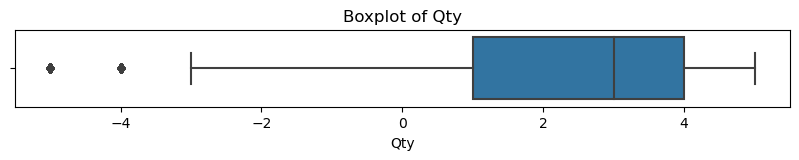

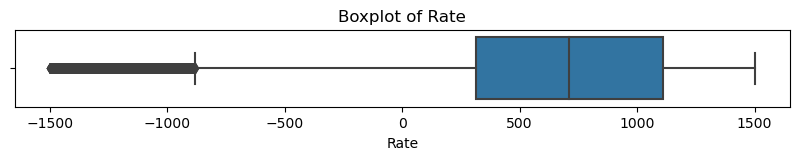

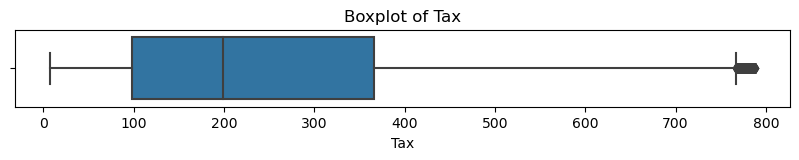

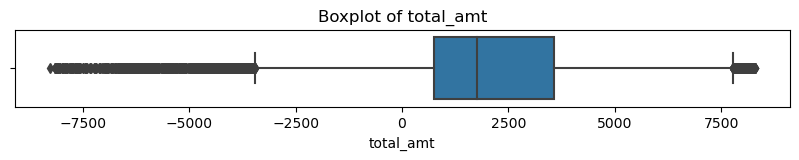

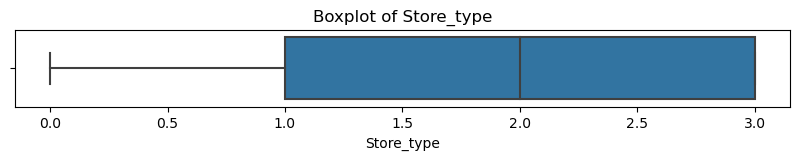

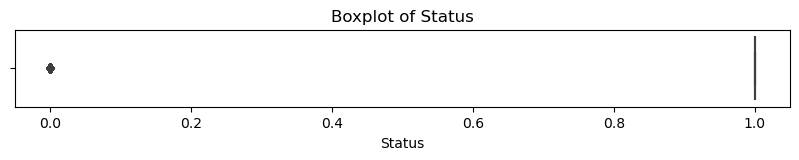

In [36]:
#Checking the outliers 
for column in merged_num.columns:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=merged_num[column])
    plt.title(f"Boxplot of {column}")
    plt.show() 

#### We have created a function for lower bound and upper bound 

In [37]:
#udf of lower cutof and upper cutof 
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [38]:
merged_num.apply(outliertreat_IQR)

,customer_Id,Gender,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status
0,262666.125,-1.5,-5.065661e+10,-7.5,-2.5,-3.5,-883.5,-302.95125,-3449.2575,-2.0,1.0
1,279383.125,2.5,1.509161e+11,20.5,9.5,8.5,2304.5,766.99875,7781.9625,6.0,1.0


In [39]:
merged_num.shape

(23040, 11)

In [40]:
#Treating the Outliers by cliping them with lower bound and upper bound 
merged_num['Qty'] =merged_num.Qty.clip(lower = -3.5, upper = 8.5)
merged_num['Rate'] =merged_num.Rate.clip(lower = -885.0, upper = 2307.0)
merged_num['Tax'] =merged_num.Tax.clip(lower = -303.03, upper = 767.13)
merged_num['total_amt'] =merged_num.total_amt.clip(lower = -3449.2575, upper = 7781.9625)

In [41]:
merged_num.shape

(23040, 11)

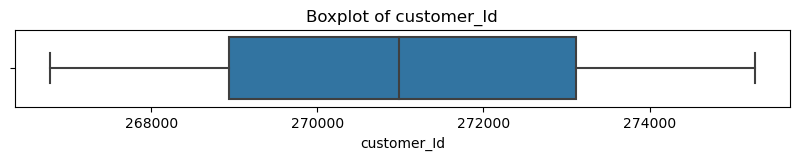

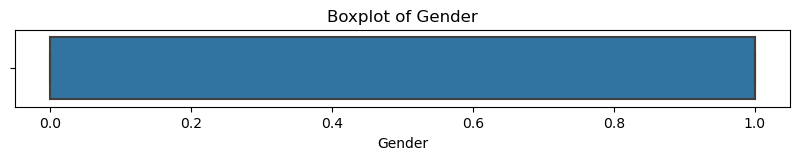

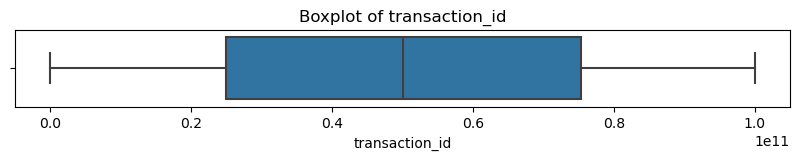

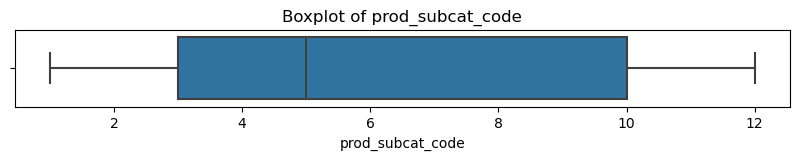

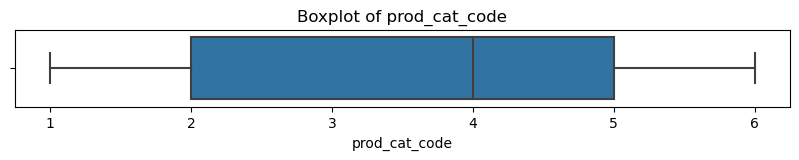

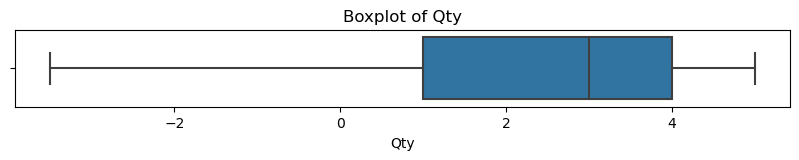

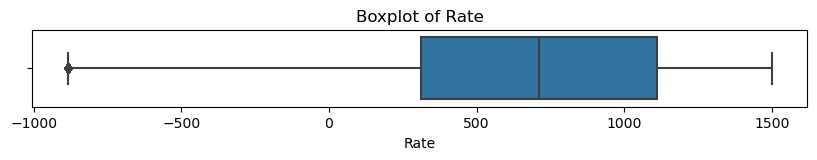

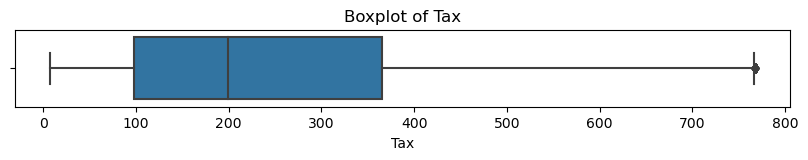

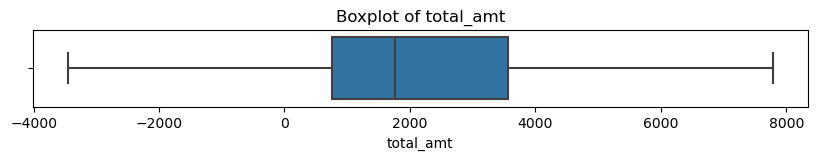

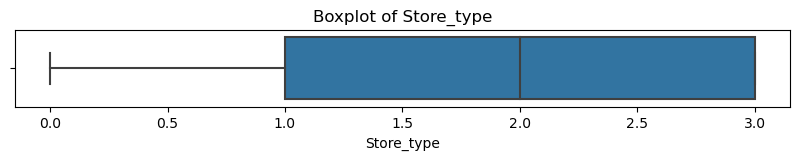

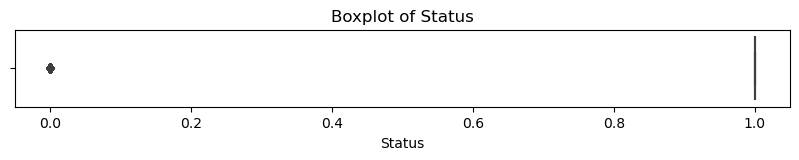

In [42]:
#Checking the outliers after treating them 
for column in merged_num:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=merged_num[column])
    plt.title(f"Boxplot of {column}")
    plt.show() 

# Balancing The Dataset 

### Checking our dataset is balanced or not 

<Axes: xlabel='Status'>

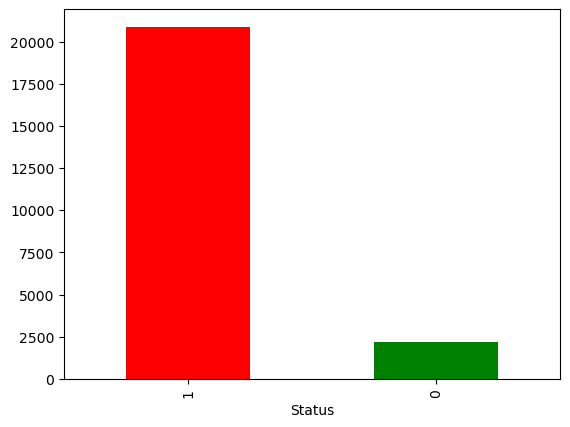

In [43]:
merged_num["Status"].value_counts().plot(kind="bar",color=["red","green"])

#### As we can see our dataset is highly unblacned so we are going to use over sampling technique.

In [44]:
merged_num["Status"].value_counts()

Status
1    20876
0     2164
Name: count, dtype: int64

In [45]:
#creating majority class and minority class
majo=merged_num[merged_num.Status==1]
mino=merged_num[merged_num.Status==0]

In [46]:
#We use sample method for over sampling 
ov_mino = mino.sample(replace = True, n = 20860, random_state = 123)#random_state it's won't shuffle if we run this multiple time 

In [47]:
# Concatenate the oversampled minority class with the original DataFrame
merged_num = pd.concat([ov_mino, majo])

In [48]:
#checking the value counts after appllying over sampling method 
merged_num["Status"].value_counts()

Status
1    20876
0    20860
Name: count, dtype: int64

<Axes: xlabel='Status'>

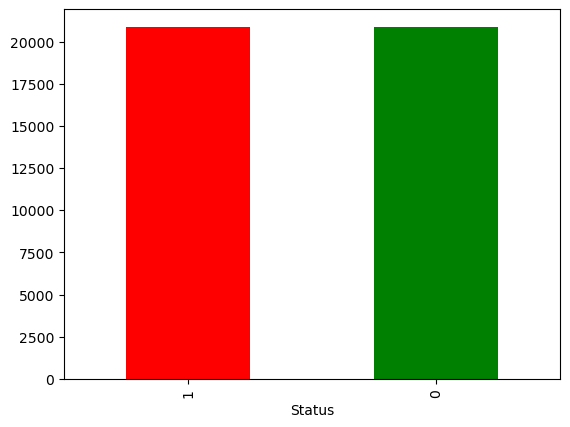

In [49]:
merged_num["Status"].value_counts().plot(kind="bar",color=["red","green"])

##### Now our dataset is Fully balanced so we can move ahed for Freature Engineering 

# Feature Engieering 

In [50]:
#correlation analysis 
merged_num.corr().abs()

,customer_Id,Gender,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status
customer_Id,1.000000,0.030070,0.023606,0.011977,0.005351,0.013314,0.000982,0.011585,0.005509,0.009081,0.007909
Gender,0.030070,1.000000,0.007074,0.017720,0.019599,0.007756,0.007234,0.002679,0.005552,0.018351,0.008860
transaction_id,0.023606,0.007074,1.000000,0.010734,0.001917,0.019787,0.016381,0.013712,0.020833,0.007349,0.017217
prod_subcat_code,0.011977,0.017720,0.010734,1.000000,0.563973,0.008632,0.003826,0.012200,0.006327,0.023876,0.006755
prod_cat_code,0.005351,0.019599,0.001917,0.563973,1.000000,0.011454,0.006699,0.013017,0.009976,0.032410,0.007989
Qty,0.013314,0.007756,0.019787,0.008632,0.011454,1.000000,0.825602,0.026478,0.898506,0.009130,0.917735
Rate,0.000982,0.007234,0.016381,0.003826,0.006699,0.825602,1.000000,0.046886,0.918259,0.005100,0.899074
Tax,0.011585,0.002679,0.013712,0.012200,0.013017,0.026478,0.046886,1.000000,0.132429,0.006752,0.021496
total_amt,0.005509,0.005552,0.020833,0.006327,0.009976,0.898506,0.918259,0.132429,1.000000,0.009431,0.826416
Store_type,0.009081,0.018351,0.007349,0.023876,0.032410,0.009130,0.005100,0.006752,0.009431,1.000000,0.008318


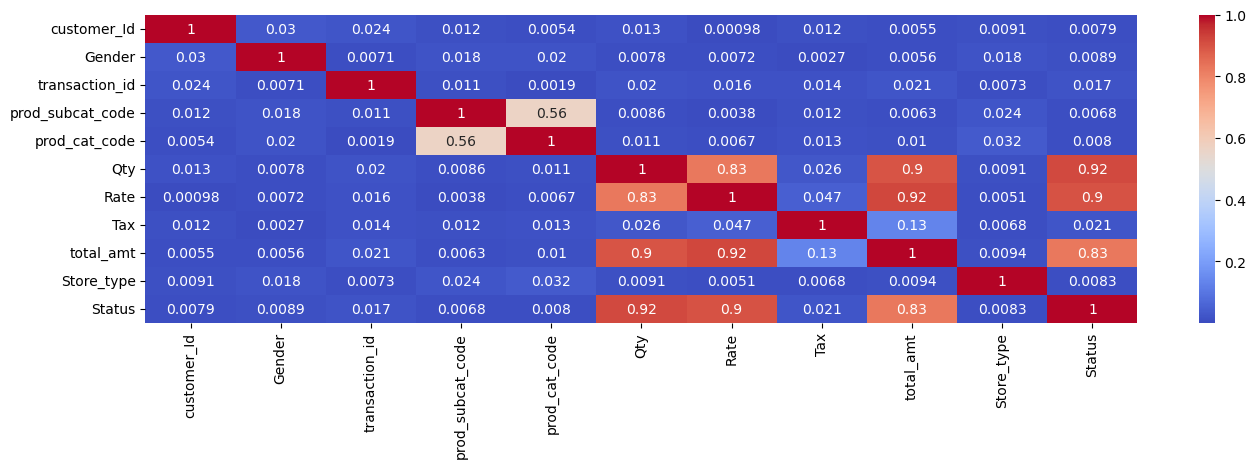

In [51]:
#ploting the correlation using heatmap
plt.figure(figsize=(16,4))
sns.heatmap(merged_num.corr().abs(),annot=True,cmap="coolwarm")
plt.show()

##### As we added the status variable and that will be our target variable and as we can see there is only the 3 variables having the good correlation but we are going to take all the varibales because we have less variabels. mention the variables name as well

### Spliting the data with X and Y for Maching learning 

In [52]:
#7. traning testing split 
x=merged_num.drop('Status',axis=1)
y=merged_num['Status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#random_state will shuffel the data points


In [53]:
x_train.shape

(33388, 10)

In [54]:
x_test.shape

(8348, 10)

In [55]:
y_test.shape

(8348,)

In [56]:
y_train.shape

(33388,)

# Building Logistic regression model 

In [57]:
#importing necessary library
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
train_pred_logi=model.predict(x_train)

In [61]:
test_pred_logi = model.predict(x_test)

In [62]:
print(accuracy_score(train_pred_logi,y_train))

0.4992512279861028


In [63]:
lr_aucc=accuracy_score(train_pred_logi,y_train)

In [64]:
print(accuracy_score(test_pred_logi,y_test))

0.502036415908002


In [65]:
lr_test=accuracy_score(test_pred_logi,y_test)

In [66]:
#printing classification report
print(classification_report(test_pred_logi,y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      8348
           1       0.00      0.00      0.00         0

    accuracy                           0.50      8348
   macro avg       0.50      0.25      0.33      8348
weighted avg       1.00      0.50      0.67      8348



# Building naive bayes model 

In [67]:
#Importing necessary library 
from sklearn.naive_bayes import GaussianNB

In [68]:
gnb = GaussianNB()

In [69]:
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [70]:
y_train_pred = gnb.predict(x_train)

In [71]:
y_train_pred = pd.Series(y_train_pred)

In [72]:
Model_data_train = pd.DataFrame(y_train)

In [73]:
Model_data_train

,Status
6893,1
7449,0
20552,1
12799,0
15859,1
...,...
13852,0
11751,0
19083,1
18805,0


In [74]:
Model_data_train.shape

(33388, 1)

In [75]:
Model_data_train['y_pred'] = y_train_pred

In [76]:
pd.crosstab(Model_data_train.Status,Model_data_train.y_pred, margins = True)

y_pred,0,1,All
Status,,,
0,7359,9310,16669
1,7086,9633,16719
All,14445,18943,33388


In [77]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[7157 9512]
 [7067 9652]]

True Positives(TP) =  7157

True Negatives(TN) =  9652

False Positives(FP) =  9512

False Negatives(FN) =  7067


(2, 2)

<Axes: >

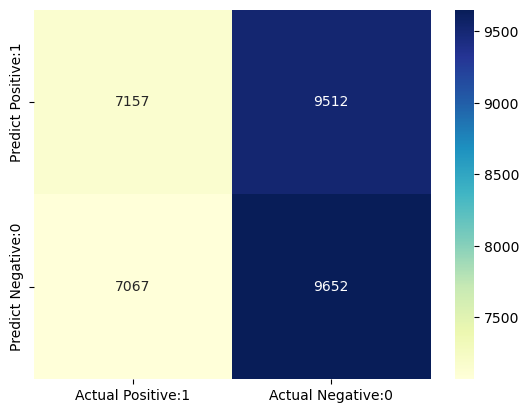

In [78]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [79]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46     16669
           1       0.50      0.58      0.54     16719

    accuracy                           0.50     33388
   macro avg       0.50      0.50      0.50     33388
weighted avg       0.50      0.50      0.50     33388



In [80]:
naive_aucc=accuracy_score(y_train,y_train_pred)

In [81]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

In [82]:
print('model accuracy-->{0:0.3f}'.format(accuracy_score(y_train,y_train_pred)))

model accuracy-->0.503


In [83]:
print('model accuracy-->{0:0.3f}'.format(accuracy_score(test_pred_naive,y_test)))

model accuracy-->0.511


In [84]:
naive_test=accuracy_score(test_pred_naive,y_test)

## Decision Classifier 

In [85]:
#importing neccesary files
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [86]:
ds=DecisionTreeClassifier()

In [87]:
ds.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
test_pred=ds.predict(x_test)

In [89]:
train_pred=ds.predict(x_train)

In [90]:
print(f"Train Accuracy {accuracy_score(train_pred,y_train)}")
print(f"Test Accuracy {accuracy_score(test_pred,y_test)}")

Train Accuracy 1.0
Test Accuracy 1.0


In [91]:
dt_aucc=accuracy_score(train_pred,y_train)
dt_test=accuracy_score(test_pred,y_test)

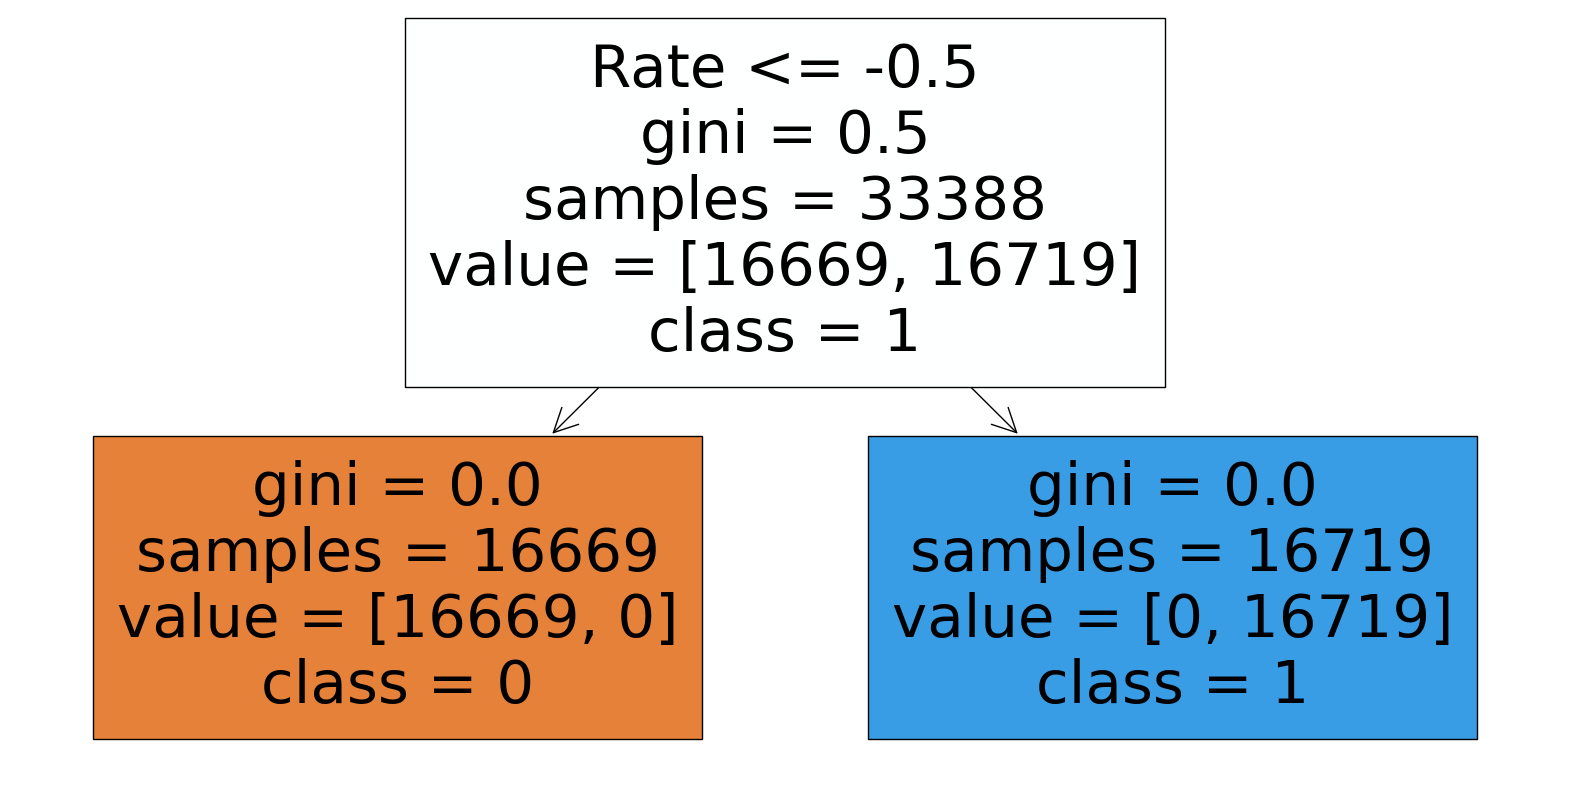

In [92]:
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(ds,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

# Random Forest classifier Model 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [95]:
rfr=RandomForestClassifier(n_estimators=6,max_depth=3,random_state=42)

In [96]:
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42)

In [97]:
test_pred_rf=rfr.predict(x_test)

In [98]:
train_pred_rf=rfr.predict(x_train)

In [99]:
print(f"Train Accuracy {accuracy_score(train_pred_rf,y_train)}")

print(f"Test Accuracy {accuracy_score( test_pred_rf,y_test)}")

Train Accuracy 1.0
Test Accuracy 1.0


In [100]:
rf_aucc=accuracy_score(train_pred_rf,y_train)
test_aucc=accuracy_score(test_pred_rf,y_test)

In [101]:
mse = mean_squared_error(y_test, test_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")
mse = mean_squared_error(y_train, train_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00
Mean Squared Error: 0.00


# Building KNN model 

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [105]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [106]:
# Fit the model to your training data
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [107]:
# Predict labels for test data
test_pred_knn = knn_model.predict(x_test_scaled)

In [108]:
train_pred_knn = knn_model.predict(x_train_scaled)

In [109]:
knn_aucc=accuracy_score(train_pred_knn,y_train)

In [110]:
print(accuracy_score(train_pred_knn,y_train))

0.9993710315083263


In [111]:
print(accuracy_score(test_pred_knn,y_test))

0.9994010541447054


In [112]:
knn_test=accuracy_score(test_pred_knn,y_test)
print(classification_report(test_pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4196
           1       1.00      1.00      1.00      4152

    accuracy                           1.00      8348
   macro avg       1.00      1.00      1.00      8348
weighted avg       1.00      1.00      1.00      8348



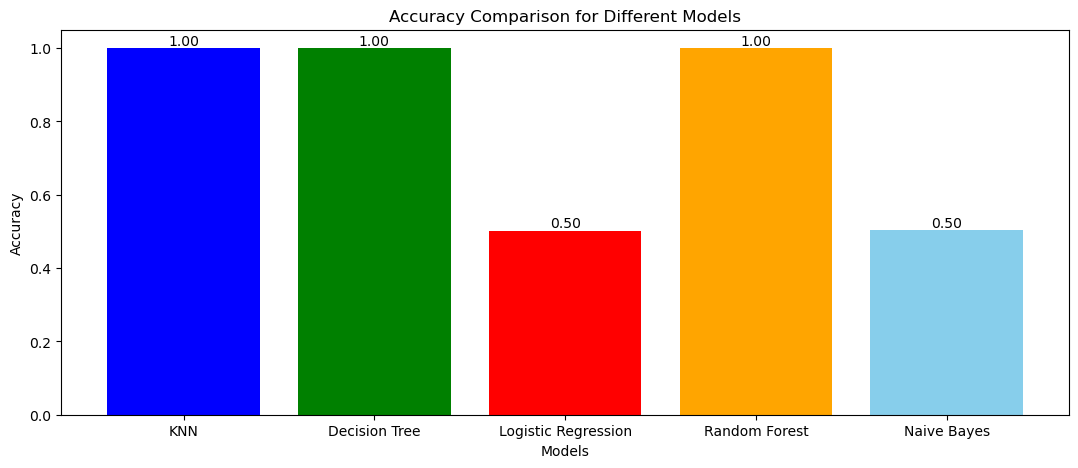

In [113]:
#Create a bar graph for knn, decision tree, random forest, and logistic regression
models = ['KNN', 'Decision Tree',"Logistic Regression", 'Random Forest', 'Naive Bayes',] 
accuracy_values = [knn_aucc, dt_aucc,lr_test, rf_aucc, naive_aucc] 
plt.figure(figsize=(13, 5))
# Plot the bar graph
bars = plt.bar(models, accuracy_values, color=['blue', 'green', 'red', 'orange',"skyblue"])
#Add accuracy values on top of each bar
plt.bar_label(bars, labels=[f"{acc:.2f}" for acc in accuracy_values])
#Add Labels and title 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
#Show the plot
plt.show()